# Heart Failure Prediction - A Data Analysis Approach

## Motivation

Cardiovascular diseases (CVDs) kill approximately 17 million lives each year. accounting for around 31% of all deaths worldwide. CVDs can cause heart failure which is a result of heart's inability to pump enough blood to meet the requirements of human body. People with CVDs or those at high risk of CVDs need early detection and management mechanism to prevent heart failure. By using machine learning one can predict a patients survival from their data and identify most important features in their medical records. 

## Dataset Description
The dataset used is from the following article:

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020) [link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

Dataset containins the medical records of 299 heart failure patients with 12 features collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old (Table 1). All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

## Description of Features

| Feature | Explanation | Measurement | Range |             
| :-: | :-: | :-: | :-: |
|Age|Patient's age|Years|[40,…, 95]|      
Anaemia|Decrease of red blood cells or hemoglobin|Boolean|0, 1|              
High blood pressure|Indicator of hypertension|Boolean|0, 1|              
Creatinine phosphokinase|Level of the CPK enzyme in the blood|mcg/L|[23,…, 7861]|    
Diabetes|Indicator of diabetes|Boolean|0, 1|              
Ejection fraction|Percentage of blood leaving left ventricle|Percentage|[14,…, 80]|      
Sex|Woman or man|Binary|0, 1|              
Platelets|Platelets in the blood|kiloplatelets/mL|[25.01,…, 850.00]|
Serum creatinine|Level of creatinine in the blood|mg/dL|[0.50,…, 9.40]|  
Serum sodium|Level of sodium in the blood|mEq/L|[114,…, 148]|    
Smoking|Indicator of smoking habit|Boolean|0, 1              
Time|Follow-up period|Days|[4,…,285]|        
(target) death event|Indicator of the patient's death during the follow-up period|Boolean|0, 1|          


1. Boolean features
        * Sex - Gender of patient Male = 1, Female =0
        * Diabetes - 0 = No, 1 = Yes
        * Anaemia - 0 = No, 1 = Yes
        * High_blood_pressure - 0 = No, 1 = Yes
        * Smoking - 0 = No, 1 = Yes
        * DEATH_EVENT - 0 = No, 1 = Yes

2. Other informations
        * mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre
* The time feature seams to be highly correlated to the death event but there is no concret information of how this metric was measured patient by patient.

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from tensorflow.keras.layers import Dense, Input, Conv1D,MaxPooling1D, GlobalMaxPooling1D, GaussianNoise, BatchNormalization,Flatten,Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


# Data Preparation

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv') #uploading data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Excluding follow-up time from the dataset to focus on the clinical features.The follow up time seems to be highly correlated to the death event but there is no concret information of how this metric was measured patient by patient.

In [5]:
data = data.drop('time',axis = 1)  
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [6]:
unique_data = pd.DataFrame([data[c].value_counts().size for c in data.columns], index=data.columns, columns = ['count of unique values'])
unique_data

,count of unique values
age,47
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
sex,2


In [7]:
data.iloc[:,:-1].describe() #descriptive statistics

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000


In [8]:
#descriptive statistics for death event = 1
data[data['DEATH_EVENT'] == 1].iloc[:,:-1].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000


In [9]:
##descriptive statistics for death event = 0
data[data['DEATH_EVENT'] == 0].iloc[:,:-1].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,58.761906,0.408867,540.054187,0.418719,40.266010,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123
std,10.637890,0.492840,753.799572,0.494569,10.859963,0.469579,97531.202283,0.654083,3.982923,0.478071,0.469579
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000
25%,50.000000,0.000000,109.000000,0.000000,35.000000,0.000000,219500.000000,0.900000,135.500000,0.000000,0.000000
50%,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263000.000000,1.000000,137.000000,1.000000,0.000000
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.200000,140.000000,1.000000,1.000000
max,90.000000,1.000000,5209.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000


In [10]:
#identifying missing values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [11]:
#creating a list for numerical features and categorical features
cat_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
num_features = pd.Series(data.columns)
num_features = num_features[~num_features.isin(cat_features)]

# Exploratory Data Analysis
A basic general analysis is performed in this section to summarize the main characteristics
of this data.

### Histogram

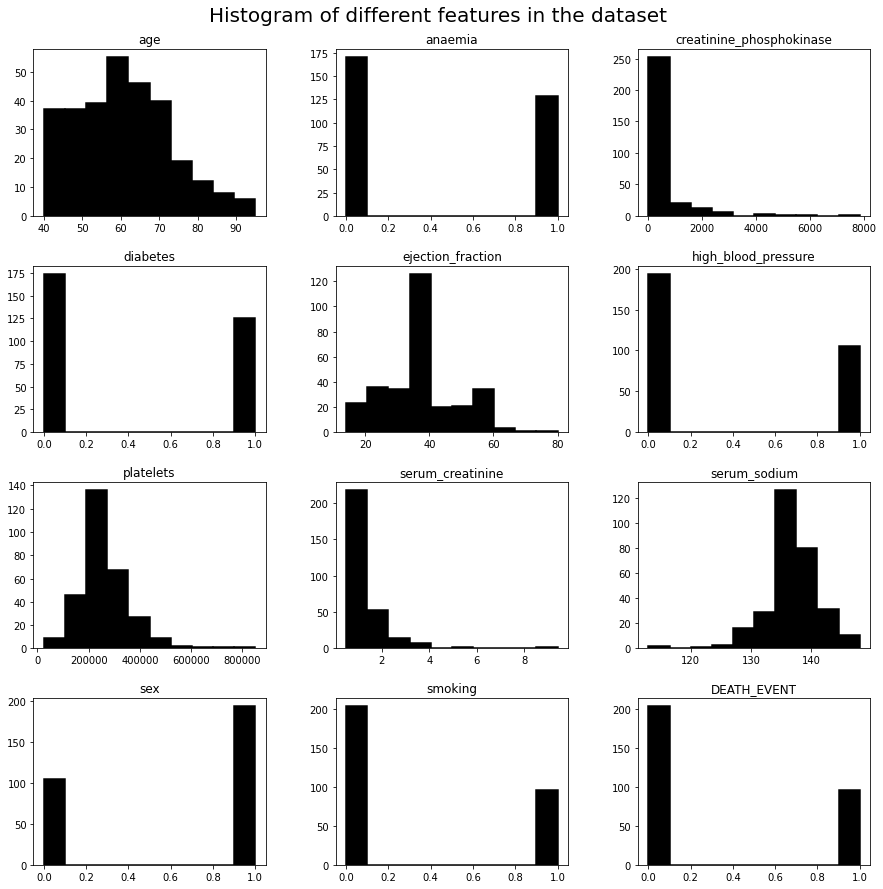

In [12]:
#HISTOGRAM
data.hist(figsize = (15,15), grid = False, color = "black", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Histogram of different features in the dataset',fontsize = 20,y= 0.92)
plt.show()

The histogram shows that some of the features in the dataset contain outliers. Let us use box plots to identify outliers

### Box plot

Text(0.5, 0.93, 'Boxplots of numerical features to identify outliers')

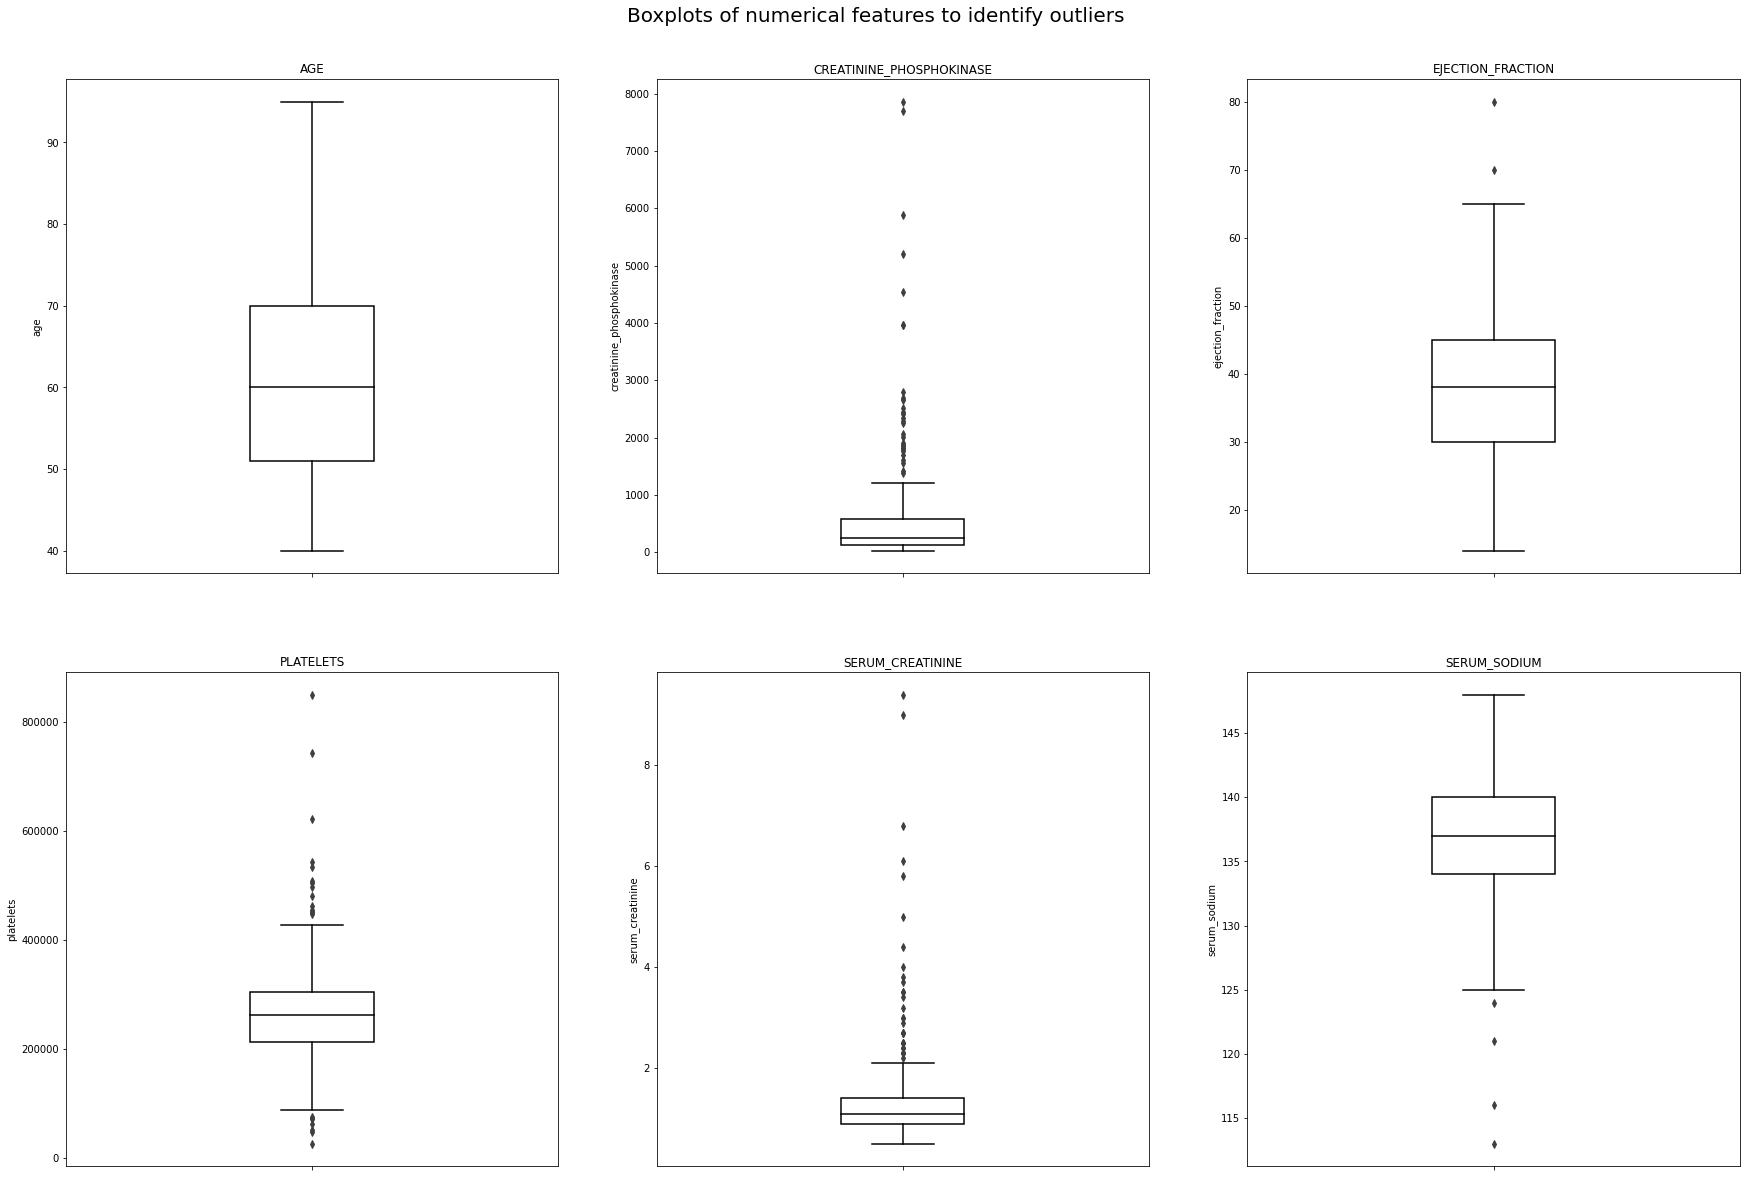

In [13]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
r = c = 0
fig,ax = plt.subplots(2,3,figsize=(30,20))
for n,i in enumerate(num_features):
    sns.boxplot(y = i,data=data,ax=ax[r,c],width=0.25,**PROPS)
    ax[r,c].set_title(i.upper())
    c+=1
    if (n+1)%3==0:
        r+=1
        c=0
plt.suptitle('Boxplots of numerical features to identify outliers', y = 0.93,fontsize = 20)

For some of the numerical features, the above box plot shows several data points outside its whiskers indicating presence of outliers. We will remove the outliers later.

### Distribution plots

Text(0.5, 0.98, 'Distribution of Age')

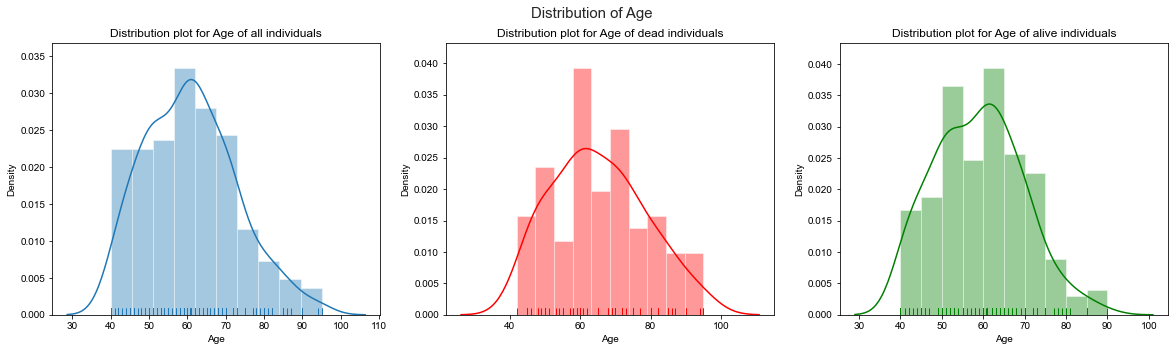

In [14]:
#age analysis
fig,ax = plt.subplots(1,3,figsize = (20,5))
sns.set_style('whitegrid')
sns.distplot(data['age'], kde = True, rug = True, bins = 10,ax =ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution plot for Age of all individuals')
sns.distplot(data[data['DEATH_EVENT'] == 1]['age'], kde = True, rug = True, bins = 10,color = 'red',ax = ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Density')
ax[1].set_title('Distribution plot for Age of dead individuals')
sns.distplot(data[data['DEATH_EVENT'] == 0]['age'], kde = True, rug = True, bins = 10,color = 'green',ax = ax[2])
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Density')
ax[2].set_title('Distribution plot for Age of alive individuals')
plt.suptitle('Distribution of Age',fontsize = 15,y = 0.98)



In [15]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


Similar distribution is observed across all the three categories

Text(0.5, 0.94, 'Distribution of various categorical features with age')

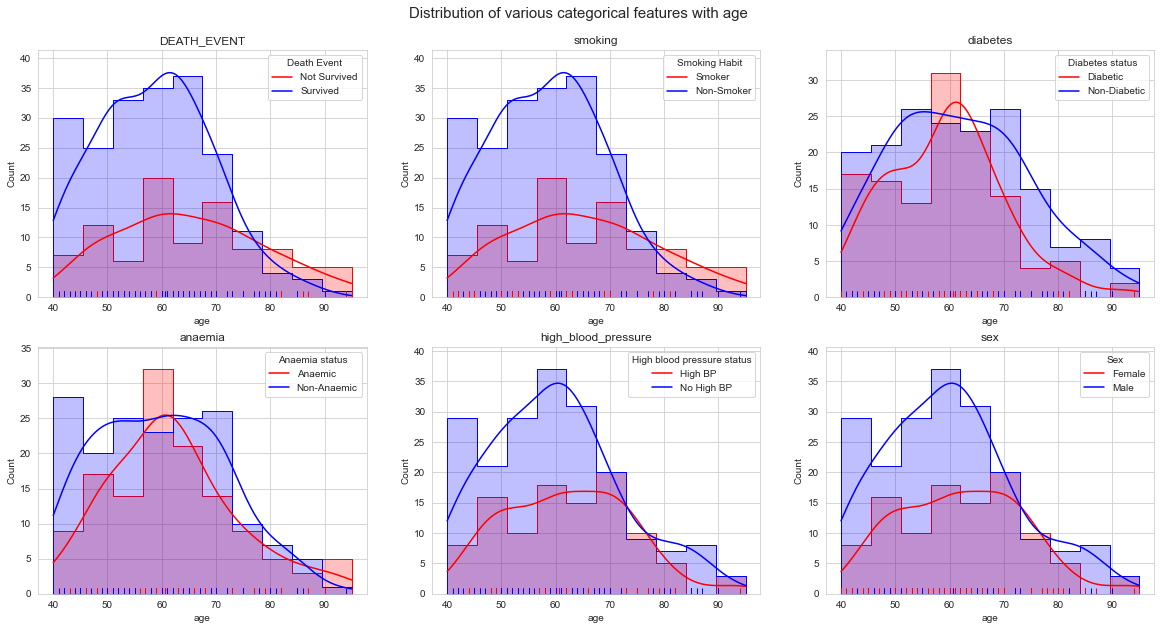

In [16]:
fig,ax = plt.subplots(2,3,figsize = (20,10))
sns.set_style('whitegrid')
sns.histplot(data,x = 'age', hue = 'DEATH_EVENT',kde = True,legend = False, element = "step", palette = ["blue","red"],ax = ax[0,0])
sns.rugplot(data = data,x= 'age',hue = 'DEATH_EVENT',legend = False, palette = ["blue","red"],ax = ax[0,0])
ax[0,0].legend(title='Death Event', loc='upper right', labels=['Not Survived', 'Survived'])
ax[0,0].set_title("DEATH_EVENT")
sns.histplot(data,x = 'age', hue = 'DEATH_EVENT',kde = True,legend = False, element = "step", palette = ["blue","red"],ax = ax[0,1])
sns.rugplot(data = data,x= 'age',hue = 'smoking',legend = False, palette = ["blue","red"],ax = ax[0,1])
ax[0,1].legend(title='Smoking Habit', loc='upper right', labels=['Smoker', 'Non-Smoker'])
ax[0,1].set_title("smoking")
sns.histplot(data,x = 'age', hue = 'diabetes',kde = True,legend = False, element = "step", palette = ["blue","red"],ax = ax[0,2])
sns.rugplot(data = data,x= 'age',hue = 'diabetes',legend = False, palette = ["blue","red"],ax = ax[0,2])
ax[0,2].legend(title='Diabetes status', loc='upper right', labels=['Diabetic', 'Non-Diabetic'])
ax[0,2].set_title("diabetes")
sns.histplot(data,x = 'age', hue = 'anaemia',kde = True,legend = False, element = "step", palette = ["blue","red"],ax = ax[1,0])
sns.rugplot(data = data,x= 'age',hue = 'anaemia',legend = False, palette = ["blue","red"],ax = ax[1,0])
ax[1,0].legend(title='Anaemia status', loc='upper right', labels=['Anaemic', 'Non-Anaemic'])
ax[1,0].set_title("anaemia")
sns.histplot(data,x = 'age', hue = 'high_blood_pressure',kde = True,legend = False, element = "step", palette = ["blue","red"],ax = ax[1,1])
sns.rugplot(data = data,x= 'age',hue = 'high_blood_pressure',legend = False, palette = ["blue","red"],ax = ax[1,1])
ax[1,1].legend(title='High blood pressure status', loc='upper right', labels=['High BP', 'No High BP'])
ax[1,1].set_title("high_blood_pressure")
sns.histplot(data,x = 'age', hue = 'high_blood_pressure',kde = True,legend = False, element = "step", palette = ["blue","red"],ax = ax[1,2])
sns.rugplot(data = data,x= 'age',hue = 'sex',legend = False, palette = ["blue","red"],ax = ax[1,2])
ax[1,2].legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
ax[1,2].set_title("sex")
plt.suptitle('Distribution of various categorical features with age', fontsize = 15, y = 0.94)



### Multiple bar plots

Text(0.5, 0.98, 'Bar graphs for various categorical features and deaths')

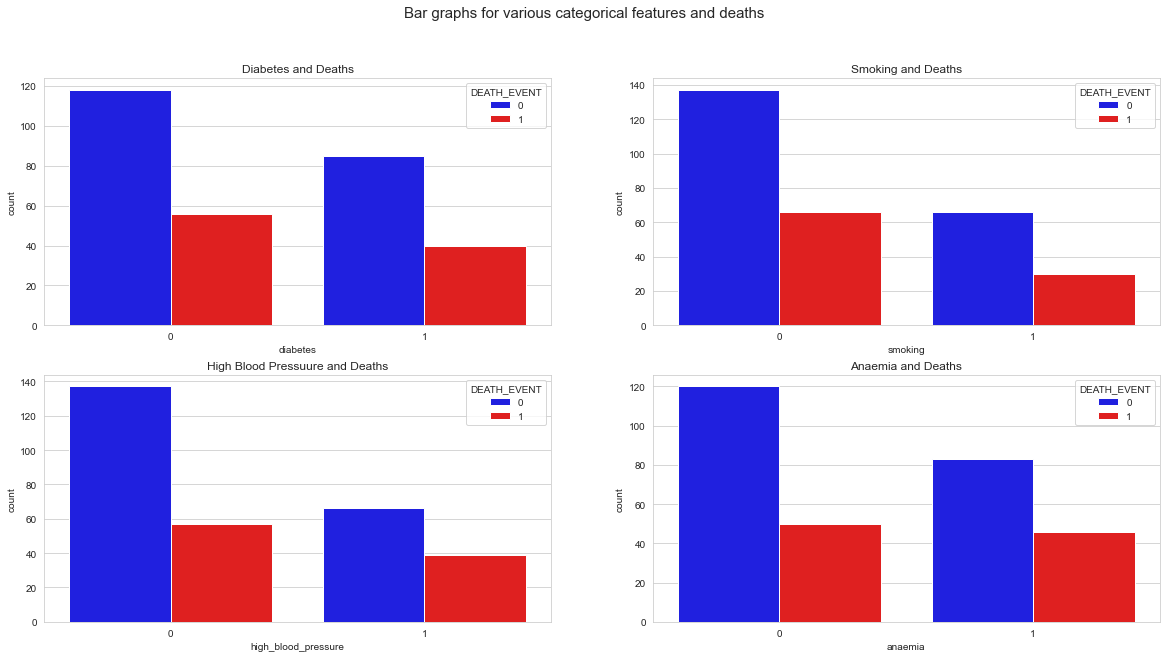

In [17]:

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
sns.countplot(data = data, x = 'diabetes', hue = 'DEATH_EVENT',palette = ['blue', 'red'], ax = ax[0,0] )
ax[0,0].set_title('Diabetes and Deaths')
sns.countplot(data = data, x = 'smoking', hue = 'DEATH_EVENT',palette = ['blue', 'red'], ax = ax[0,1] )
ax[0,1].set_title('Smoking and Deaths')
sns.countplot(data = data, x = 'high_blood_pressure', hue = 'DEATH_EVENT',palette = ['blue', 'red'], ax = ax[1,0] )
ax[1,0].set_title('High Blood Pressuure and Deaths')
sns.countplot(data = data, x = 'anaemia', hue = 'DEATH_EVENT',palette = ['blue', 'red'], ax = ax[1,1] )
ax[1,1].set_title('Anaemia and Deaths')
plt.suptitle('Bar graphs for various categorical features and deaths', fontsize = 15)

### Regression plots

Text(0.5, 0.98, 'Sex wise probability of occurence of death for different ages')

<Figure size 1800x2160 with 0 Axes>

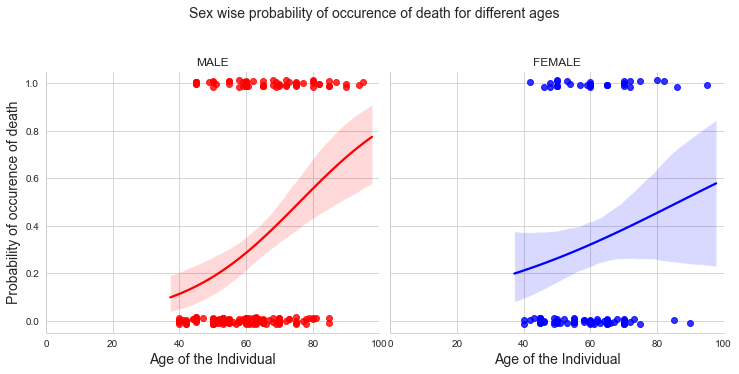

In [18]:
#lm plot for sex wise probability of occurance of death for different ages 
plt.figure(figsize = (25,30))
sns.set_style('whitegrid')
g = sns.lmplot(x="age", y="DEATH_EVENT", col="sex", hue="sex", col_order = [1,0],data=data, y_jitter=.015, logistic=True, palette = ['blue','red'], truncate=False)
g.set(xlim=(0, 100), ylim=(-.05, 1.05));
g.set_axis_labels('Age of the Individual', 'Probability of occurence of death',fontsize = 14)
axes = g.axes.flatten()
axes[0].set_title("MALE")
axes[1].set_title("FEMALE")
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Sex wise probability of occurence of death for different ages',fontsize = 14)


Text(0.5, 0.98, 'Smoking habit wise probability of occurence of death for different ages')

<Figure size 1440x720 with 0 Axes>

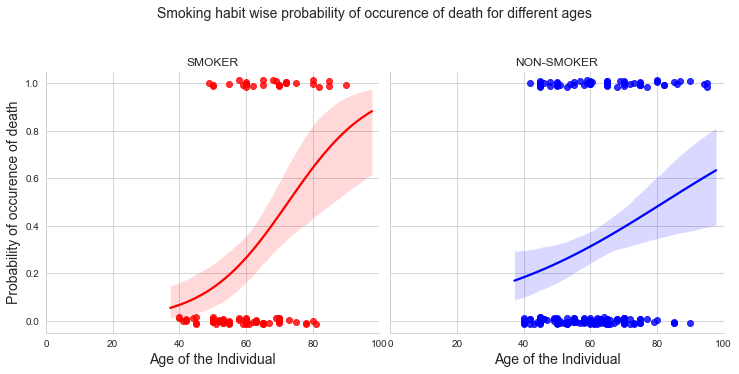

In [19]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
g = sns.lmplot(x="age", y="DEATH_EVENT", col="smoking", hue="smoking", col_order = [1,0],data=data, y_jitter=.015, logistic=True, palette = ['blue','red'], truncate=False)
g.set(xlim=(0, 100), ylim=(-.05, 1.05));
g.set_axis_labels('Age of the Individual', 'Probability of occurence of death',fontsize = 14)
axes = g.axes.flatten()
axes[0].set_title("SMOKER")
axes[1].set_title("NON-SMOKER")
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Smoking habit wise probability of occurence of death for different ages',fontsize = 14)

Text(0.5, 0.98, 'Diabetes status wise probability of occurence of death for different ages')

<Figure size 1440x720 with 0 Axes>

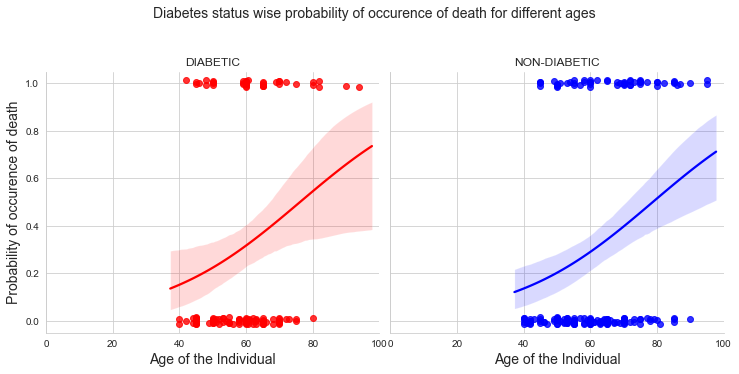

In [20]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
g = sns.lmplot(x="age", y="DEATH_EVENT", col="diabetes", hue="diabetes", col_order = [1,0],data=data, y_jitter=.015, logistic=True, palette = ['blue','red'], truncate=False)
g.set(xlim=(0, 100), ylim=(-.05, 1.05));
g.set_axis_labels('Age of the Individual', 'Probability of occurence of death',fontsize = 14)
axes = g.axes.flatten()
axes[0].set_title("DIABETIC")
axes[1].set_title("NON-DIABETIC")
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Diabetes status wise probability of occurence of death for different ages',fontsize = 14)

Text(0.5, 0.98, 'Anaemia status wise probability of occurence of death for different ages')

<Figure size 1440x720 with 0 Axes>

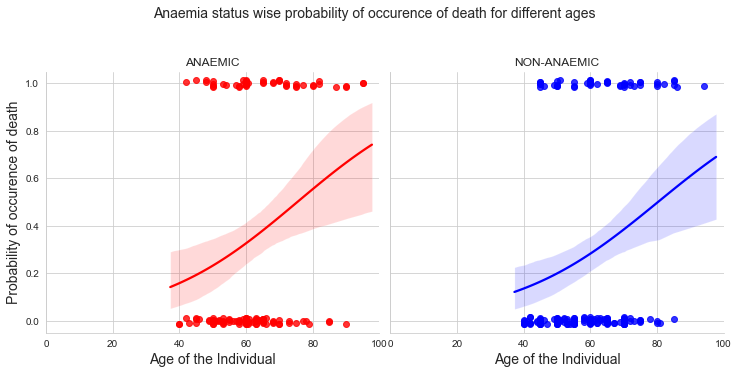

In [21]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
labels = ['MALE', 'FEMALE']
g = sns.lmplot(x="age", y="DEATH_EVENT", col="anaemia", hue="anaemia", col_order = [1,0],data=data, y_jitter=.015, logistic=True, palette = ['blue','red'], truncate=False)
g.set(xlim=(0, 100), ylim=(-.05, 1.05));
g.set_axis_labels('Age of the Individual', 'Probability of occurence of death',fontsize = 14)
axes = g.axes.flatten()
axes[0].set_title("ANAEMIC")
axes[1].set_title("NON-ANAEMIC")
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Anaemia status wise probability of occurence of death for different ages',fontsize = 14)

Text(0.5, 0.98, 'High blood pressure status wise probability of occurence of death for different ages')

<Figure size 1440x720 with 0 Axes>

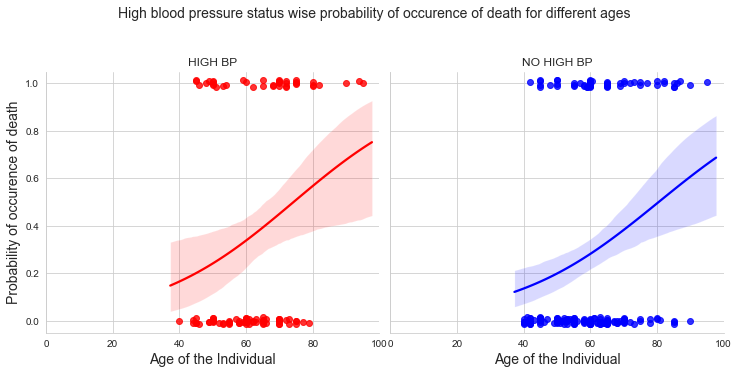

In [22]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
g = sns.lmplot(x="age", y="DEATH_EVENT", col="high_blood_pressure", hue="high_blood_pressure", col_order = [1,0],data=data, y_jitter=.015, logistic=True, palette = ['blue','red'], truncate=False)
g.set(xlim=(0, 100), ylim=(-.05, 1.05));
g.set_axis_labels('Age of the Individual', 'Probability of occurence of death',fontsize = 14)
axes = g.axes.flatten()
axes[0].set_title("HIGH BP")
axes[1].set_title("NO HIGH BP")
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('High blood pressure status wise probability of occurence of death for different ages',fontsize = 14)

### Correlation plots


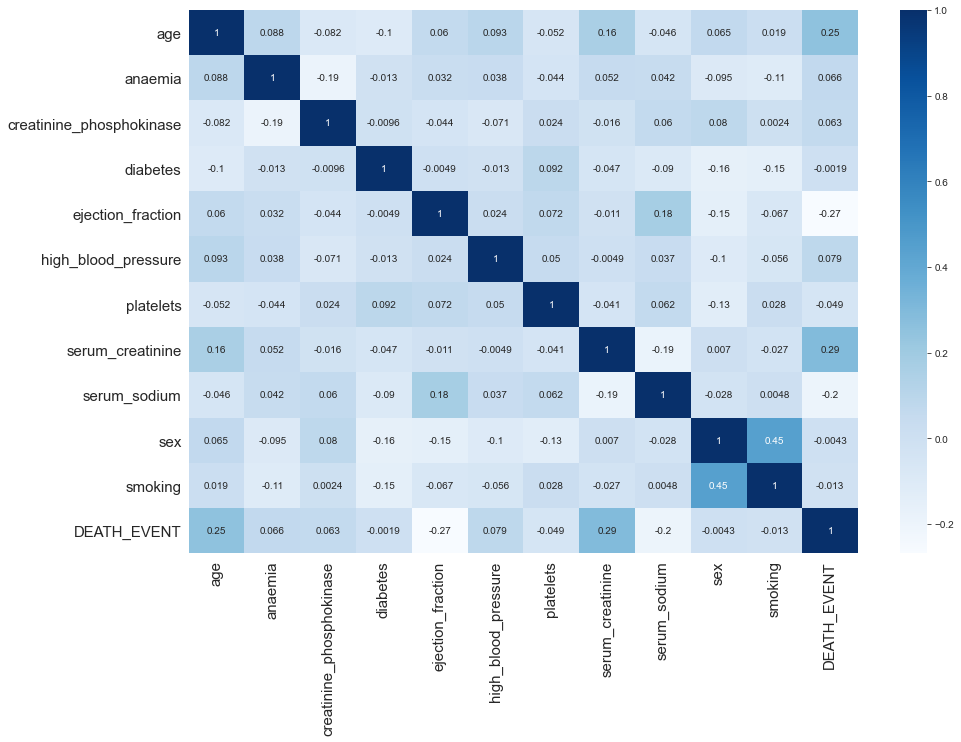

In [23]:
fig, ax = plt.subplots(figsize = (15,10))
corr = data.corr()
sns.heatmap(corr, ax=ax, cmap = "Blues",annot = True)
ax.tick_params(labelsize=15)

<Figure size 1080x1080 with 0 Axes>

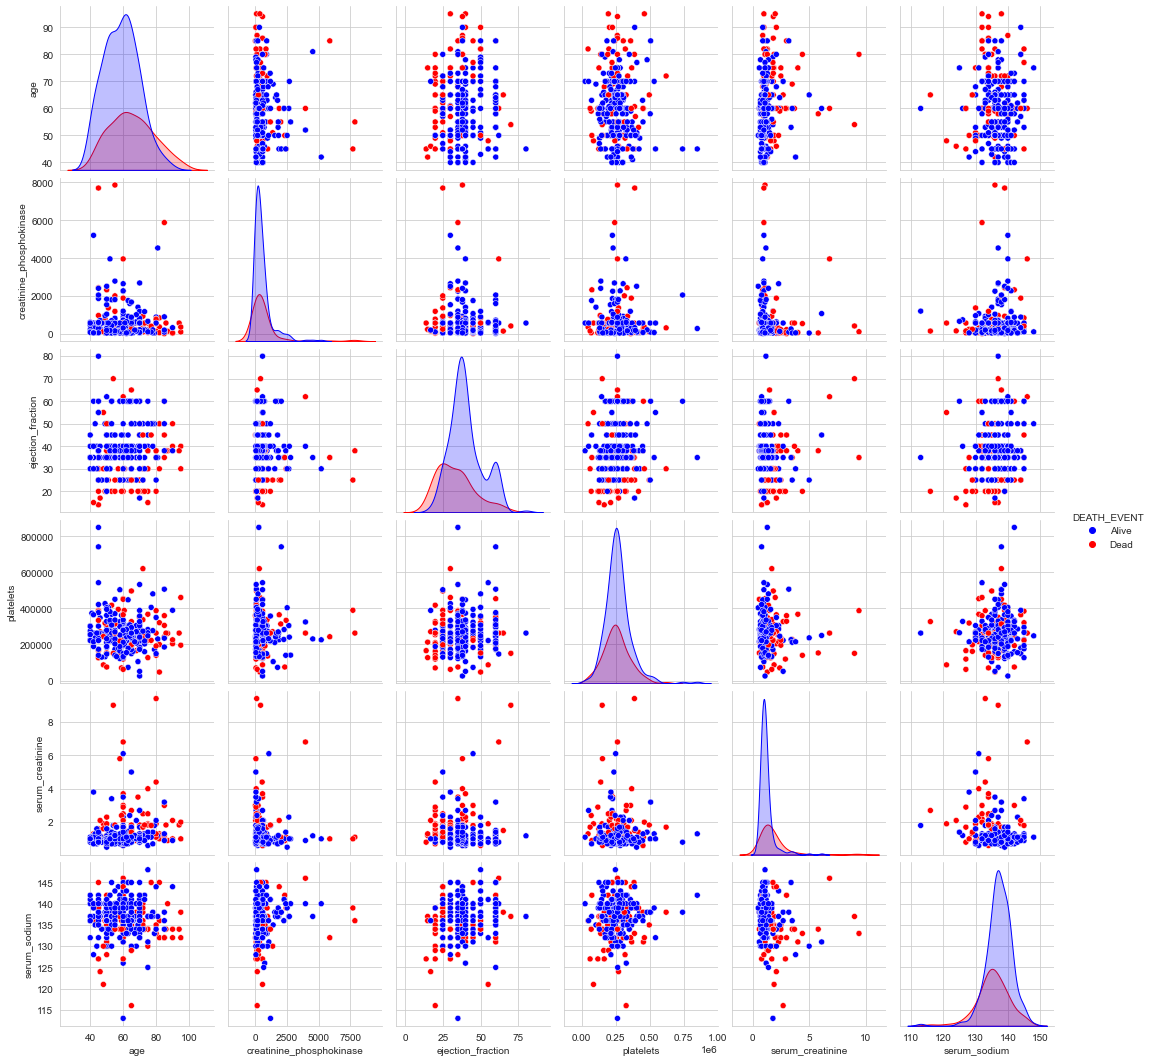

In [24]:
plt.figure(figsize=(15,15))
data_1 = data.copy()
data_1.loc[data.DEATH_EVENT == 1, 'DEATH_EVENT' ] = 'Dead'
data_1.loc[data.DEATH_EVENT== 0,'DEATH_EVENT'] = 'Alive'
g = sns.pairplot(data=data_1[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','DEATH_EVENT']], 
                 hue='DEATH_EVENT',hue_order = ['Alive','Dead'],palette = ['blue','red']);


In [25]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

The features 'age', 'ejection_fraction', 'serum_creatinine' and 'serum_sodium' have a considerable correlation with 'DEATH_EVENT'

### Identifying and removing outliers using histograms and boxplots

In [26]:
data_copy = data.copy()
#remove outliers
for x in num_features:
    q75,q25 = np.percentile(data_copy.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_copy.loc[data[x] < min,x] = np.nan
    data_copy.loc[data[x] > max,x] = np.nan
    
#https://www.askpython.com/python/examples/detection-removal-outliers-in-python

In [27]:
data_copy.isnull().sum()

age                          0
anaemia                      0
creatinine_phosphokinase    29
diabetes                     0
ejection_fraction            2
high_blood_pressure          0
platelets                   21
serum_creatinine            29
serum_sodium                 4
sex                          0
smoking                      0
DEATH_EVENT                  0
dtype: int64

In [28]:
data_copy = data_copy.dropna(axis = 0)
data_copy.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

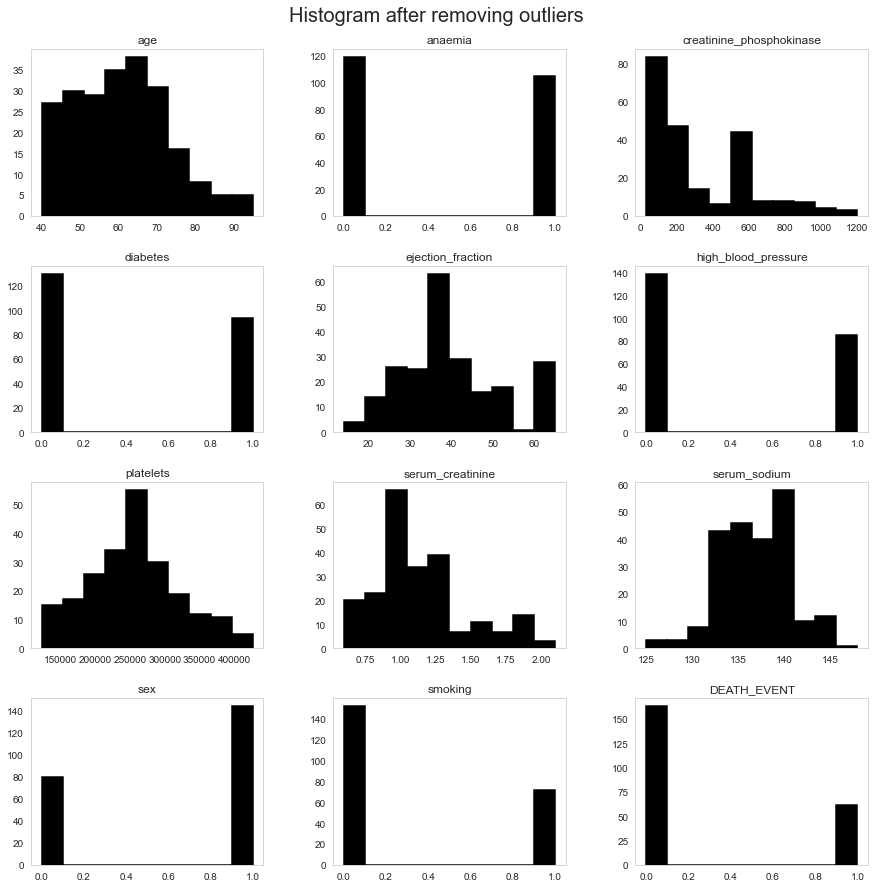

In [29]:
data_copy.hist(figsize = (15,15), grid = False, color = "black", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Histogram after removing outliers',fontsize = 20,y= 0.92)
plt.show()

Text(0.5, 0.91, 'Boxplots of numerical features after removing outliers')

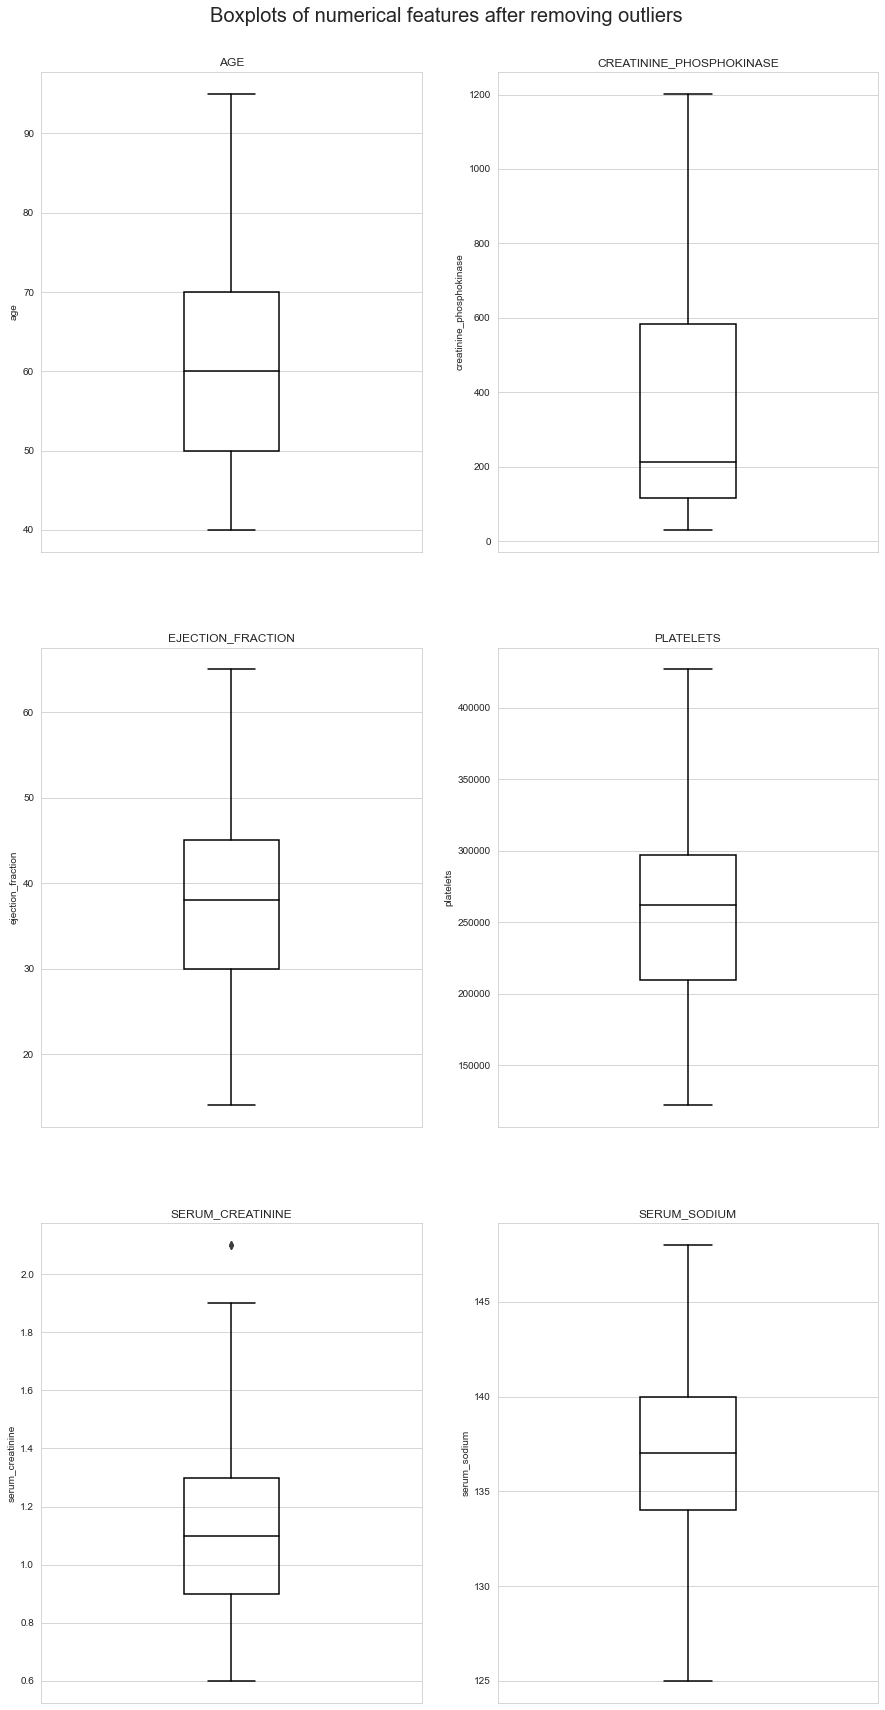

In [30]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(15,30))
for n,i in enumerate(num_features):
    sns.boxplot(y = i,data=data_copy,ax=ax[r,c],width=0.25,**PROPS)
    ax[r,c].set_title(i.upper())
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
plt.suptitle('Boxplots of numerical features after removing outliers', y = 0.91,fontsize = 20)



As seen above most of the outliers have been removed using histograms and box plots

### Box plots to identify relationship between numerical features and target variable


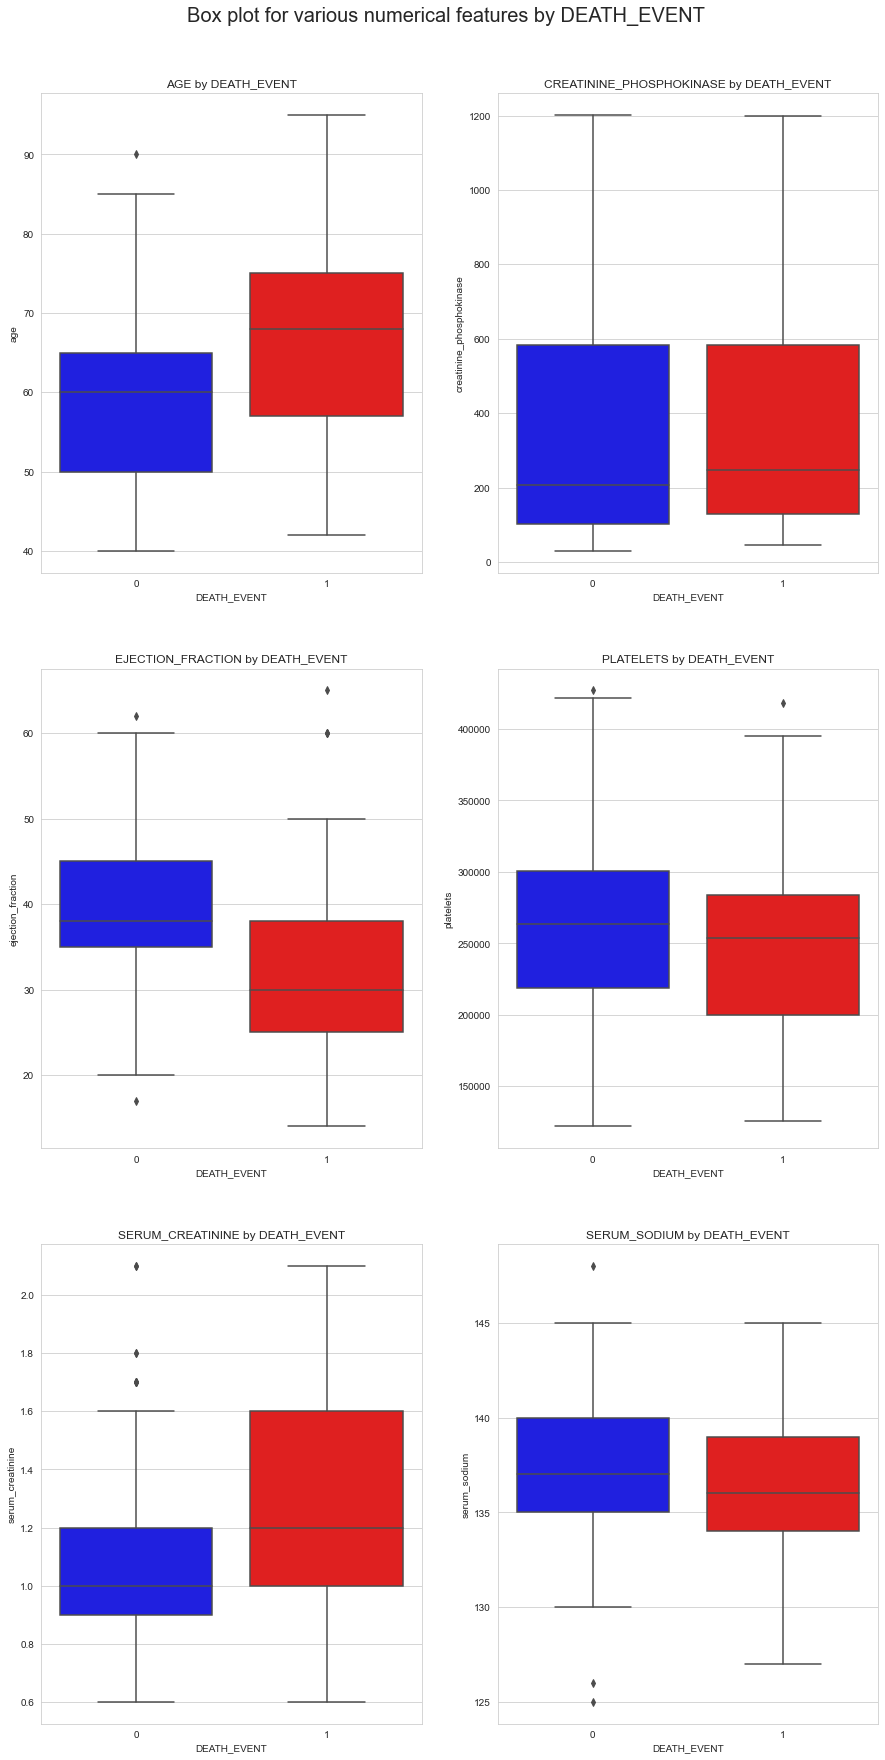

In [31]:
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(15,30))
for n,i in enumerate(num_features):
    sns.boxplot(y= i,x="DEATH_EVENT",data=data_copy,palette = ['blue','red'],ax=ax[r,c])
    ax[r,c].set_title(i.upper()+" by "+"DEATH_EVENT")
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
plt.suptitle('Box plot for various numerical features by DEATH_EVENT', fontsize=20,y = 0.92)
plt.show()

### Count plot for class distribution

In [32]:
data = data_copy
data = data.reset_index(drop=True)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.0,1.9,130.0,1,0,1
1,65.0,0,146.0,0,20.0,0,162000.0,1.3,129.0,1,1,1
2,50.0,1,111.0,0,20.0,0,210000.0,1.9,137.0,1,0,1
3,90.0,1,47.0,0,40.0,1,204000.0,2.1,132.0,1,1,1
4,75.0,1,246.0,0,15.0,0,127000.0,1.2,137.0,1,0,1


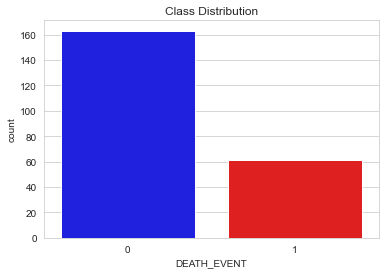

In [33]:
#count plot for class distribution
sns.countplot(data = data, x = 'DEATH_EVENT',palette = ['blue','red'])
plt.title("Class Distribution");

In [34]:
data.DEATH_EVENT.value_counts()

0    163
1     61
Name: DEATH_EVENT, dtype: int64

In [35]:
(data.DEATH_EVENT.value_counts()/len(data.DEATH_EVENT))*100

0    72.767857
1    27.232143
Name: DEATH_EVENT, dtype: float64

A class is said to be imbalanced if a single category dominates another category. In this case '0' appears 163 times while '1' appears 61 times. The dataset is imbalanced since approximately 73% of the classes point to 0.


### Identifying relationship between categorical variables and target variables using contigency tables, chi-square tests and bar plots

In [36]:
for i in cat_features[:-1]:
    ct = pd.crosstab(columns=data[i],index=data["DEATH_EVENT"])
    stat, p, dof, expected = chi2_contingency(ct) 
    print(f"\n{'_'*len(f'{i.upper()} & DEATH_EVENT')}")
    print(f"{i.upper()} & DEATH_EVENT")
    print(f"{'_'*len(f'{i.upper()} & DEATH_EVENT')}")
    print(ct)
    print(f"\nH0: NO RELATIONSHIP BETWEEN DEATH_EVENT & {i.upper()}\nH1: RELATIONSHIP BETWEEN DEATH_EVENT & {i.upper()}")
    print(f"\nP-VALUE: {np.round(p,2)}")
    print("REJECT NULL HYPOTHESIS H0" if p<0.05 else "FAILED TO REJECT NULL HYPOTHESIS H0")


_____________________
ANAEMIA & DEATH_EVENT
_____________________
anaemia       0   1
DEATH_EVENT        
0            90  73
1            29  32

H0: NO RELATIONSHIP BETWEEN DEATH_EVENT & ANAEMIA
H1: RELATIONSHIP BETWEEN DEATH_EVENT & ANAEMIA

P-VALUE: 0.38
FAILED TO REJECT NULL HYPOTHESIS H0

______________________
DIABETES & DEATH_EVENT
______________________
diabetes      0   1
DEATH_EVENT        
0            93  70
1            37  24

H0: NO RELATIONSHIP BETWEEN DEATH_EVENT & DIABETES
H1: RELATIONSHIP BETWEEN DEATH_EVENT & DIABETES

P-VALUE: 0.74
FAILED TO REJECT NULL HYPOTHESIS H0

_________________________________
HIGH_BLOOD_PRESSURE & DEATH_EVENT
_________________________________
high_blood_pressure    0   1
DEATH_EVENT                 
0                    105  58
1                     34  27

H0: NO RELATIONSHIP BETWEEN DEATH_EVENT & HIGH_BLOOD_PRESSURE
H1: RELATIONSHIP BETWEEN DEATH_EVENT & HIGH_BLOOD_PRESSURE

P-VALUE: 0.3
FAILED TO REJECT NULL HYPOTHESIS H0

___________

The chi-square tests shows no categorical variable has a relationship with the target variable.

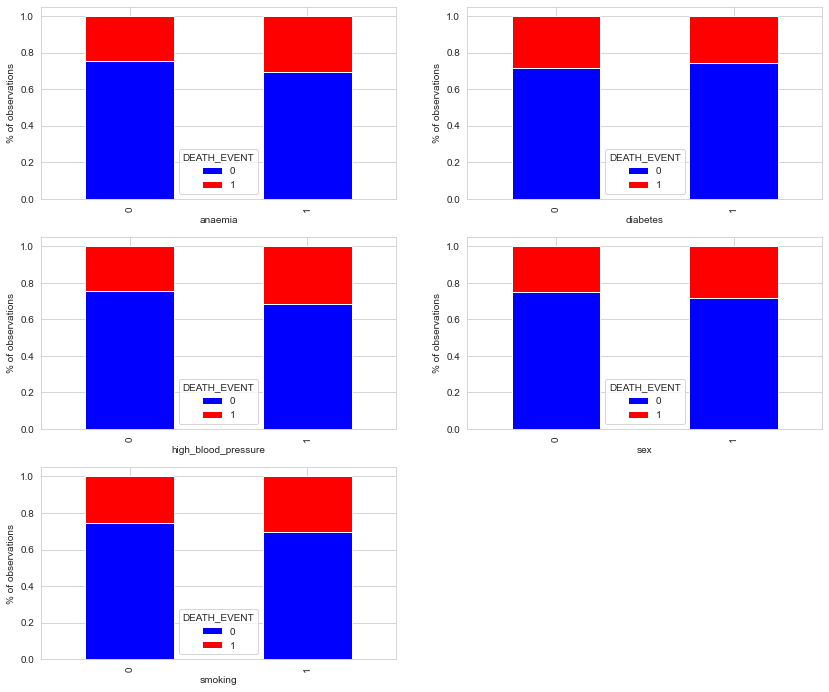

In [37]:
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(14,12))
for n,i in enumerate(cat_features[:-1]):
    ct = pd.crosstab(columns = data[i],index=data["DEATH_EVENT"],normalize="columns")
    ct.T.plot(kind="bar",stacked=True,color=["blue","red"],ax=ax[r,c])
    ax[r,c].set_ylabel("% of observations")
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

The above bar plots also doesn't show a strong relationship among categorical variables and target variables as seen in the chi-square tests.

# Feature Selection

We will use extra trees classifier to identify a set of features which we will be using for our confirmatory data analysis

In [38]:
#Segregating into data and labels
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [39]:
model = ExtraTreesClassifier(n_estimators=5000,random_state=11)
model.fit(X,y)
imp_features = pd.DataFrame(model.feature_importances_)
imp_features.index = pd.Series(data.iloc[:,:-1].columns)
imp_features = (imp_features*100).copy().sort_values(by=0,ascending=False)
imp_features = imp_features.reset_index()
imp_features.columns = ["Feature","Score"]
print(imp_features)

                     Feature      Score
0          ejection_fraction  18.621702
1           serum_creatinine  16.561702
2                        age  14.560490
3                  platelets  10.899602
4               serum_sodium  10.527043
5   creatinine_phosphokinase   9.848398
6                   diabetes   4.541032
7                    smoking   3.816407
8        high_blood_pressure   3.713949
9                    anaemia   3.594498
10                       sex   3.315176


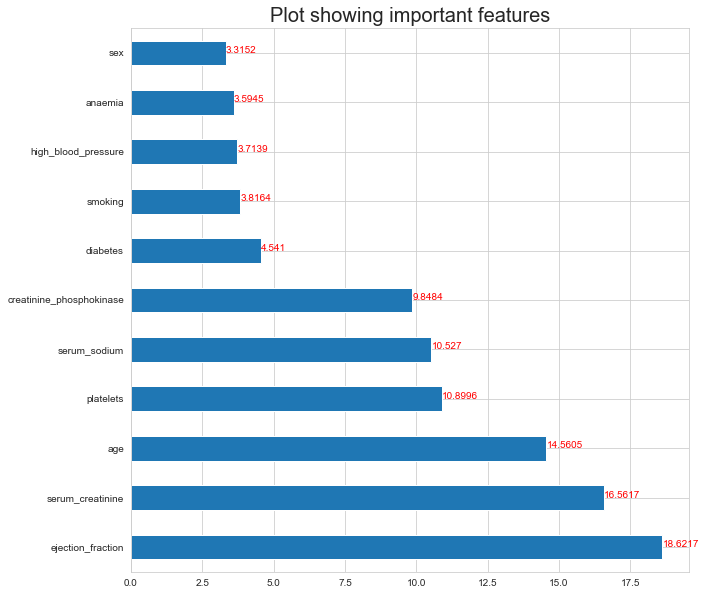

In [40]:
plt.figure(figsize=(10,10))
temp = (pd.Series(model.feature_importances_, index=data.iloc[:,:-1].columns)
   .nlargest(12))*100
temp.plot(kind='barh')
for i, v in enumerate(temp):
    plt.text(v+0.01, i, str(np.round(v,4)), color='red')
plt.title('Plot showing important features', fontsize = 20)
plt.show()


The above plot ranks the features from largest to lowest importance. As observed, the categorical features are less important as compared to the numerical features. From the graph 9.84 seems like a good threshold for selecting features. We will next implement a way to automatically identify the threshold for the features to be selected. Since the class is moderately imbalanced, F1 score would be an appropriate metric instead of accuracy.

In [41]:
for var in np.arange(imp_features.shape[0],5,-1):
    X_new = X[imp_features.iloc[:var,0]].copy()#sorting from largest to smallest importnce
    X_train, X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=11) 
    final_rf = ExtraTreesClassifier(random_state=15)
    gscv = GridSearchCV(estimator=final_rf,param_grid={
        "n_estimators":[100,500,1000,5000],
        "criterion":["gini","entropy"]
    },cv=5,n_jobs=-1,scoring="f1_weighted")

    gscv.fit(X_train,y_train)
    print(str(var)+" variables:  "+str(gscv.best_estimator_)+"  F1 score: "+str(gscv.best_score_))


11 variables:  ExtraTreesClassifier(n_estimators=5000, random_state=15)  F1 score: 0.6576180314469368
10 variables:  ExtraTreesClassifier(criterion='entropy', n_estimators=500, random_state=15)  F1 score: 0.6618954972902341
9 variables:  ExtraTreesClassifier(n_estimators=5000, random_state=15)  F1 score: 0.652120987334236
8 variables:  ExtraTreesClassifier(n_estimators=500, random_state=15)  F1 score: 0.6624548200001921
7 variables:  ExtraTreesClassifier(random_state=15)  F1 score: 0.678693899397709
6 variables:  ExtraTreesClassifier(criterion='entropy', n_estimators=5000, random_state=15)  F1 score: 0.7108256548662595


Model with top 6 variables works well. Hence the threshold is 9.84. We'll include all the features with importance above the threshold. So let's build a model with the 6 variables

# Using different models for predicting heart failure

In [42]:
X_new = X[imp_features.iloc[:6,0]].copy()

#Splitting the data into training and testing sets
X_train, X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=11)

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

Logistic regression accuracy : 84.44%


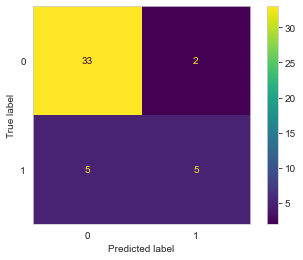

In [43]:
#Logistic regression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
p1=lr.predict(X_test)
s1=accuracy_score(y_test,p1)
print("Logistic regression accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, X_test, y_test)
plt.grid()
plt.show()

### Gradient Boost classifier

Gradient Booster Classifier Accuracy : 86.67%


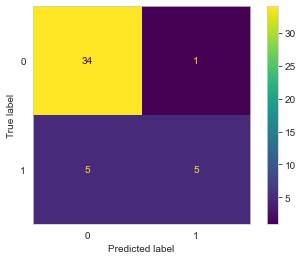

In [44]:
np.random.seed(17)
gbc=GradientBoostingClassifier(learning_rate = 0.056,n_estimators = 100)
gbc.fit(X_train,y_train)
p2=gbc.predict(X_test)
s2=accuracy_score(y_test,p2)
print("Gradient Booster Classifier Accuracy :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, X_test, y_test)
plt.grid()
plt.show()

### Decision Tree Classifier

Decision Tree Classifier Accuracy : 88.89%


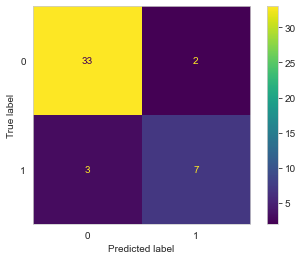

In [45]:
np.random.seed(0)
dtc = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=11, criterion='gini')
dtc.fit(X_train, y_train)
p3=dtc.predict(X_test)
s3=accuracy_score(y_test,p3)
print("Decision Tree Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(dtc, X_test, y_test)
plt.grid()
plt.show()

### Random Forest Classifier

Random Forest Classifier Accuracy : 84.44%


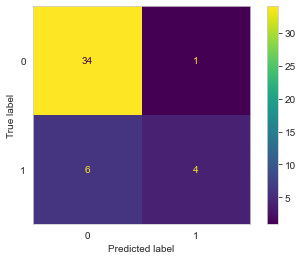

In [46]:
np.random.seed(11)
rfc=RandomForestClassifier(n_estimators=800,criterion = 'gini')
rfc.fit(X_train,y_train)
p4=rfc.predict(X_test)
s4=accuracy_score(y_test,p4)
print("Random Forest Classifier Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(rfc, X_test, y_test)
plt.grid()
plt.show()

### Xgboost classifier

[19:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy : 86.67%


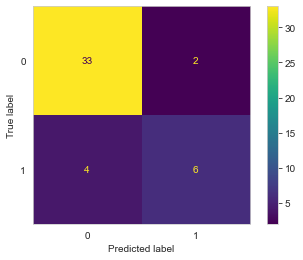

In [47]:
xgbo = xgb.XGBClassifier(objective = "binary:logistic", learning_rate = 0.0035,n_estimators = 110)
xgbo.fit(X_train,y_train)
p5=xgbo.predict(X_test)
s5=accuracy_score(y_test,p5)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s5))
plot_confusion_matrix(xgbo, X_test, y_test)
plt.grid()
plt.show()

### SVM classifier

Support Vector Machine Accuracy : 88.89%


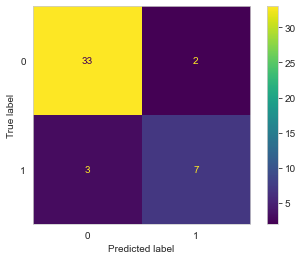

In [48]:
svm=SVC(C=2,kernel = 'linear')
svm.fit(X_train,y_train)
p6=svm.predict(X_test)
s6=accuracy_score(y_test,p6)
print("Support Vector Machine Accuracy :", "{:.2f}%".format(100*s6))
plot_confusion_matrix(svm, X_test, y_test)
plt.grid()
plt.show()

### K nearest neighbours classifier

K Nearest Neighbors Top 5 Accuracies:
[82.22, 82.22, 82.22, 82.22, 82.22]


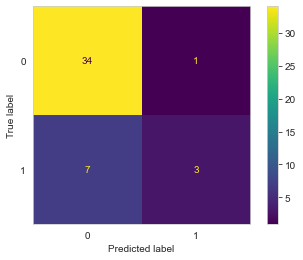

In [49]:
scores=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    p7=knn.predict(X_test)
    s7=accuracy_score(y_test,p7)
    scores.append(round(100*s7, 2))
print("K Nearest Neighbors Top 5 Accuracies:")
print(sorted(scores,reverse=True)[:5])
plot_confusion_matrix(knn, X_test, y_test)
plt.grid()
plt.show()

# Using artificial neural network to build predictive model

In [50]:
np.random.seed(0)
i = Input(shape=(len(X_train.T),))
x = Normalization()(i) 
x = Flatten()(x)
x = Dense(7, activation='tanh')(x)
x = Dropout(0.01)(x)
x = Dense(7, activation='tanh')(x)
x = Dropout(0.01)(x)
x = Dense(7, activation='tanh')(x)
x = Dropout(0.01)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.summary()




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
normalization (Normalization (None, 6)                 13        
_________________________________________________________________
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 7)                 49        
_________________________________________________________________
dropout (Dropout)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0     

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [52]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)

In [53]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
6/6 [==============================] - 1s 142ms/step - loss: 0.7107 - accuracy: 0.4281 - val_loss: 0.6967 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 0.7019 - accuracy: 0.4768 - val_loss: 0.6871 - val_accuracy: 0.5556
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6973 - accuracy: 0.4873 - val_loss: 0.6778 - val_accuracy: 0.5778
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.5349 - val_loss: 0.6694 - val_accuracy: 0.6889
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6718 - accuracy: 0.6190 - val_loss: 0.6612 - val_accuracy: 0.7556
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6717 - accuracy: 0.6107 - val_loss: 0.6528 - val_accuracy: 0.7778
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6705 - accuracy: 0.5816 - val_loss: 0.6445 - val_accuracy: 0.8000
Epoch 8/100
6/6 [==

Epoch 59/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4849 - accuracy: 0.7874 - val_loss: 0.3923 - val_accuracy: 0.8222
Epoch 60/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4599 - accuracy: 0.7878 - val_loss: 0.3906 - val_accuracy: 0.8222
Epoch 61/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4790 - accuracy: 0.7990 - val_loss: 0.3913 - val_accuracy: 0.8222
Epoch 62/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4259 - accuracy: 0.7970 - val_loss: 0.3902 - val_accuracy: 0.8222
Epoch 63/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4233 - accuracy: 0.7946 - val_loss: 0.3898 - val_accuracy: 0.8222
Epoch 64/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4278 - accuracy: 0.8066 - val_loss: 0.3887 - val_accuracy: 0.8222
Epoch 65/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4428 - accuracy: 0.7967 - val_loss: 0.3878 - val_accuracy: 0.8222
Epoch 66/100


In [54]:
p8=model.predict(X_test)>0.5

s8 = accuracy_score(y_test,p8)
print("ANN accuracy :", "{:.2f}%".format(100*s8))


ANN accuracy : 82.22%
